# Midterm Exam

## Academic Honesty Statement

**THIS IS AN INDIVIDUAL ASSESSMENT. THIS DOCUMENT AND YOUR ANSWERS ARE FOR YOUR EYES ONLY. ANY VIOLATION OF THIS POLICY WILL BE IMMEDIATELY REPORTED TO THE ELON HONOR BOARD.**

*Add the text below to the first cell of your notebook. Replace the underscores below with your name acknowledging that you have read and understood our academic community standard.*

I, ____________, hereby state that I have not communicated with or gained information in any way from my classmates or anyone other than Professor Aiken during this exam, and that all work is my own. I have properly cited any code that I have used from other sources.

## A note about grading

This is an exam, not a lab. **I do not expect everyone to be able to answer every question.** As with any exam, you do not start with 100 points and then subtract. You are starting with zero and then earning credit. For certain questions, I have indicated what you need to do in order to earn full credit.

If you see **Answer Me:**, then I'm looking for some kind of written response, beyond a table or graphic output. 

While code correctness is the most important component of the exam, I will also be looking for well-formatted graphs, proper use of Markdown, thoughtful writing, and easy-to-read code. You need to pay attention to these items to earn full credit. 

**With the existence of ChatGPT, I'm going to be very picky for projects and exams.** Be careful - I made these questions with our class notes in labs in mind. ChatGPT may give you a solution that doesn't use the tools we've discussed. **You'll need to troubleshoot that on your own.**

**If you get stuck because you can't complete the first part of a question**, write commented code (i.e. put a `#` in front of each line of code inside the cell) that does what you **would do** if you have the correct inputs. **There is partial credit.**

## Logistics

Make sure that you add/commit/synch your work. This is the only way that I'll see it on my end. 

**IF YOU GET IN TROUBLE, RUN YOUR CODE FROM START TO FINISH!**

## Exam name

Call the Jupyter notebook for this exam `lastname_firstname_exam1`.


# Our Questions

Please answer the following questions in order. **If you get stuck, move on.** 

**Use Markdown to clearly mark your questions and answers, as well as for formatting any discussion.**

We are going to start with, you guessed it, housing data. This data is a sample of Zillow data from a [Kaggle data contest](https://www.kaggle.com/c/zillow-prize-1), where the idea was to help Zillow improve the company's "Zestimate" value for each home. There was $1.2 million in prize money awarded. Zillow recently lost a bunch of money trying to buy and sell homes based, in part, on their Zestimate. Not because the Zestimate is necessarily flawed. Instead, they ran into a problem called **adverse selection** where the homes that looked undervalued were only undervalued because the homeowner knew that there were serious problems that Zillow didn't know about. 

I've posted the data dictionary on [Github](https://github.com/aaiken1/fin-data-analysis-python/), if you have questions about the variable definitions. We are only going to use a small number of them. The main data set (properties_2016_sample10_1.csv) has housing characteristics for houses listed in three Southern California counties in 2016. The other data set (train_2016_v2.csv) contains the log(pricing error) for houses sold, as well as a transaction date. I'll tell you more about the pricing error below.

We aren't doing prediction yet - but we're getting there now. This exam is focused on **cleaning, describing, and plotting data**. We might call this **exploratory data analysis** that then starts to get into **feature engineering**. You'll also see **optimization** and some **time series**. Finally, expect to use our **unsupervised learning tools**. 

Finally, **there is a podcast to listen to**. I know, I know. It is about an hour (less if you listen on 1.25x speed, even less if you have 10 cups of coffee, can see through time, and crank it up to 2x). The podcast is an interview with [Ben Wellington of Two Sigma](https://thegradientpub.substack.com/p/ben-wellington-ml-for-finance-and), a [well-known quantitative hedge fund](https://www.twosigma.com/approach/). The interview touches on **feature engineering** and how hedge funds use data to create trading strategies. The link has a transcript available, if you'd rather read than listen. Towards the end, the discussion also touches on some similar issues to what Zillow faced. Understanding how and why your data were created is really important. 

Biases, both statistical in nature and more socially constructed, contaminate data, destroy real predictive power, and end up costing you money. We'll discuss this more. 


In [2]:
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt

from matplotlib.ticker import StrMethodFormatter

from datetime import timedelta

import seaborn as sns

## Part 1
*5 points* Let's **get our data into Python and Pandas**. 

The housing data is here: <https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/properties_2016_sample10_1.csv>
The pricing and transactions data is here: <https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/train_2016_v2.csv>

Load in the **properties_2016_sample10_1.csv** file. This is a random sample of 10% of the actual data from the contest. The real file was too large for our purposes. Did you get a warning when importing? **Answer Me:** Figure out what's going on and **fix it in your data**. You can do that either upon import or after you import the data. 

Then, load in the **train_2016_v2.csv** file. This file has the log(price error) for houses sold in the area, as well as the sale date.

**Answer Me:** Briefly describe that types of variables that you see. There are a lot, so just give me a general sense.

**Merge them together** and keep only the observations in both data sets. Call the resulting data frame *zillow_data*.

In [3]:
housing = pd.read_csv('https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/properties_2016_sample10_1.csv')
pricing = pd.read_csv('https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/train_2016_v2.csv')


/tmp/ipykernel_1865/1053388224.py:1: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  housing = pd.read_csv('https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/properties_2016_sample10_1.csv')


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298522 entries, 0 to 298521
Data columns (total 58 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   parcelid                      298522 non-null  int64  
 1   airconditioningtypeid         81220 non-null   float64
 2   architecturalstyletypeid      0 non-null       float64
 3   basementsqft                  152 non-null     float64
 4   bathroomcnt                   297341 non-null  float64
 5   bedroomcnt                    297341 non-null  float64
 6   buildingclasstypeid           1302 non-null    float64
 7   buildingqualitytypeid         193961 non-null  float64
 8   calculatedbathnbr             285491 non-null  float64
 9   decktypeid                    1670 non-null    float64
 10  finishedfloor1squarefeet      20096 non-null   float64
 11  calculatedfinishedsquarefeet  292951 non-null  float64
 12  finishedsquarefeet12          270833 non-nul

In [5]:
fireplacelist = housing.fireplaceflag.value_counts()
fireplacelist

fireplaceflag
True    523
Name: count, dtype: int64

In [6]:
housing.fillna({'fireplaceflag':False}, inplace=True)


/tmp/ipykernel_1865/1368428636.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housing.fillna({'fireplaceflag':False}, inplace=True)


In [7]:
housing.fireplaceflag

0         False
1         False
2         False
3         False
4         False
          ...  
298517    False
298518    False
298519    False
298520    False
298521    False
Name: fireplaceflag, Length: 298522, dtype: bool

In [8]:
pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90275 entries, 0 to 90274
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   parcelid         90275 non-null  int64  
 1   logerror         90275 non-null  float64
 2   transactiondate  90275 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ MB


In [9]:
zillow_data = pd.merge(housing, pricing, how='inner', on='parcelid')

## Part 2
*5 points* Let's look at the data. **Answer Me:**

- What are the **min and max transaction dates in the data**? Do they make sense?
- What are the **10 most common vales for *yearbuilt* in the data**? 
- What is the **mean and median age** of a home as of the transaction date in this data set? Hint: Do you need to calculate something?
- What are the **10 most common region city and region county pairs in the data**?

Show the relevant  numbers in your output. 

All data analysis starts like this. What do we have and does it make sense? We're also creating new variables, or **features**, from existing variables. For example, maybe **age** is a what we'd actually want to use in a regression that tried to predict housing prices.


In [10]:
zillow_data['transactiondate'] = pd.to_datetime(zillow_data['transactiondate'], format='%Y-%m-%d')

print(zillow_data.transactiondate.min())
print(zillow_data.transactiondate.max())

2016-01-01 00:00:00
2016-12-30 00:00:00


In [11]:
zillow_data.groupby('yearbuilt')['parcelid'].agg('count').sort_values(ascending=False).to_frame().head(20)


,parcelid
yearbuilt,
1955.0,234
1989.0,217
1950.0,208
1954.0,206
1973.0,181
1990.0,179
1987.0,173
1964.0,169
1956.0,168


In [12]:
zillow_data['yearsold'] = zillow_data['transactiondate'].dt.year

zillow_data['age'] = zillow_data['yearsold'] - zillow_data['yearbuilt']

zillow_data['age'].agg(['mean', 'median']).round(2) 

mean      47.62
median    47.00
Name: age, dtype: float64

In [13]:
zillow_data.groupby(['regionidcity', 'regionidcounty'])['parcelid'].agg('count').sort_values(ascending=False).to_frame().head(20)


,,parcelid
regionidcity,regionidcounty,
12447.0,3101.0,2019
46298.0,3101.0,267
52650.0,1286.0,220
54311.0,3101.0,218
5534.0,3101.0,199
40227.0,3101.0,192
16764.0,1286.0,178
25218.0,1286.0,173
34278.0,2061.0,156


## Part 3
*10 points.* Create a **summary of the mean and standard deviation lot size (in square feet) and the tax value (in current dollars) by regionidcity** for all houses in the data. Then, do the same thing, but only include houses with a pool.

Round everything to two decimal places. See our notes and text for examples.

**Answer Me:** Can you figure out why standard deviation is sometimes missing?

In [14]:
zillow_data.groupby('regionidcity')[['lotsizesquarefeet', 'taxvaluedollarcnt']].agg(['mean', 'std']).round(2) 

lotsizesquarefeet           taxvaluedollarcnt           
                          mean       std              mean        std
regionidcity                                                         
3491.0                 3274.00       NaN         167870.00        NaN
4406.0                21354.93  64831.90         374480.64  354129.67
5465.0                12382.68  26743.93         306986.80  152973.27
5534.0                18029.74  40321.58         175081.05   92749.42
6021.0                 9531.96   6104.76         239490.11  184029.95
...                        ...       ...               ...        ...
396053.0               5382.22   1262.81         176237.06   79733.15
396054.0              24202.78  75097.30         363721.10  375900.13
396550.0               6313.33    399.48         264204.67  191894.76
396551.0               9476.17   5789.85         357663.56  233136.33
396556.0               6219.94   1006.80         188996.11  124439.51

[168 rows x 4 columns]

## Part 4
*10 points.* Are there any **duplicate parcel ID's** in the data? In other words, does the same house appear more than once? 
   
Create a **new DataFrame** with just the parcel ID, the pricing error, the transaction date, and the *regionidcity*. Do **not** save over your main data.

Now, we want to show any observations that have multiple parcel IDs (i.e. dupes) in your notebook. To do this, use `.duplicated()` from `pandas` and the idea of **masking**.

See here for the syntax: <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html>. 

Within `.duplicated()`, you'll want to subset on the parcel ID and choose `keep = False`. This function returns **True or False** for each observation in your DataFrame according to whether or not it is a duplicate. Here, we're checking for duplicate parcel IDs, but if you leave out that argument, then an observation would only be a duplicate if it had the same values across all variables as another row in the data. 

Use `.duplicated()` to create a DataFrame of True or False values. Then, use this DataFrame to **mask** and only select duplicated observations (i.e. observations where `.duplicated()` returned *true*) from your subset of data with only parcel ID, the pricing error, and the transaction date. Call this new DataFrame *non_unique_data*. 

Show these values in your notebook. 

**Answer Me:** What's going on with these observations? Why do a small number of houses appear twice? 

Now, what does this mean? If there are duplicate parcel IDs, then parcel ID **is not** a transaction ID. We should create a real, unique transaction ID in this data. Every row is a unique transaction. So, do that -- create a new variable in the DataFrame that is simply the observation (row) number. Use `.insert()` from `pandas` to create a new first column. You can look up the syntax [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.insert.html). Call this new column **transactionID** and make sure that it is in your main DataFrame. Use `np.arange()` and `len()` together to create the row numbers. Think about what `np.arange()` does. What argument does it take? What does that argument do? What does `len()` do? What argument does it take?

Why are we using `.insert` to create a new variable in this case? It lets us avoid [this warning](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy). That warning may still pop up from time-to-time.

In [15]:
df = zillow_data[['parcelid', 'logerror', 'transactiondate', 'regionidcity']]

dupes = df.duplicated(subset=['parcelid'], keep=False)
non_unique_data = df.loc[dupes]
non_unique_data

,parcelid,logerror,transactiondate,regionidcity
431,14607531,-0.0965,2016-06-23,24832.0
432,14607531,0.0070,2016-08-29,24832.0
1536,14444102,-0.1948,2016-04-29,13693.0
1537,14444102,-0.0812,2016-10-05,13693.0
1952,11122560,-0.0202,2016-02-08,54311.0
1953,11122560,-0.0192,2016-08-16,54311.0
2209,11866315,-0.0010,2016-01-12,54212.0
2210,11866315,0.0488,2016-06-14,54212.0
2755,14621246,-0.0141,2016-05-05,33840.0
2756,14621246,0.0159,2016-12-07,33840.0


In [16]:
zillow_data.insert(loc=0, column='transactionID', value=np.arange(len(df)))
zillow_data

,transactionID,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,yearsold,age
0,0,13005045,NaN,NaN,NaN,3.0,2.0,NaN,7.0,3.0,...,2015.0,42846.0,2246.17,NaN,NaN,6.037432e+13,0.0962,2016-05-18,2016,80.0
1,1,17279551,NaN,NaN,NaN,3.0,4.0,NaN,NaN,3.0,...,2015.0,216427.0,5972.72,NaN,NaN,6.111006e+13,0.0020,2016-09-02,2016,36.0
2,2,12605376,NaN,NaN,NaN,2.0,3.0,NaN,7.0,2.0,...,2015.0,208897.0,5160.90,NaN,NaN,6.037544e+13,-0.0566,2016-09-28,2016,59.0
3,3,11713859,NaN,NaN,NaN,2.0,2.0,NaN,4.0,2.0,...,2015.0,356056.0,7353.80,NaN,NaN,6.037236e+13,0.0227,2016-02-04,2016,63.0
4,4,17193642,NaN,NaN,NaN,3.5,3.0,NaN,NaN,3.5,...,2015.0,384172.0,8668.90,NaN,NaN,6.111006e+13,0.0237,2016-06-28,2016,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9066,9066,12653293,NaN,NaN,NaN,3.0,5.0,NaN,7.0,3.0,...,2015.0,287497.0,6857.67,NaN,NaN,6.037297e+13,-0.0305,2016-03-18,2016,85.0
9067,9067,11907619,1.0,NaN,NaN,3.0,3.0,NaN,4.0,3.0,...,2015.0,151721.0,4676.24,NaN,NaN,6.037481e+13,0.0266,2016-03-22,2016,35.0
9068,9068,14001605,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,...,2015.0,23664.0,1418.96,NaN,NaN,6.059110e+13,0.0090,2016-06-21,2016,53.0
9069,9069,12892836,NaN,NaN,NaN,2.0,3.0,NaN,4.0,2.0,...,2015.0,72383.0,3122.67,NaN,NaN,6.037402e+13,0.0497,2016-07-27,2016,65.0


## Part 5
*10 points.* Where does Zillow do the worst job at pricing homes? In other words, where do their Zestimates have the largest absolute difference from the actual sale price? The pricing error is called *logerror* in the data.

\begin{align}
log(pricing error) = log(Zestimate) − log(SalePrice)
\end{align}

Log here means the natural log.

**Answer Me:** Why did Zillow take the natural log of the pricing error? This is an example of **feature engineering**. We are making data choices.

Now, we are going to count variables two ways, with different outputs. 

### Table of counts

Using the main data, first **count up the number of times each *regionidcity* appears in the data** and output this to a new DataFrame. You'll want to use `.value_counts()`. But, note that `.value_counts()` outputs a series. This is not a DataFrame. What can you add after `.value_counts()` to get the output saved into a DataFrame? Check the notes.

**Show me a table that gives only the *regionidcity* that have over 150 transactions (i.e. observations) in the data.** 

### Creating a new variable based on a count

Next, again go back to the main data and **count up the number of houses sold in each *regionidcity*** and **create a new variable called *houses_sold***. This new variable, however, needs to live in the main DataFrame -- each row will have a value for the number of houses sold in that transaction's *regionidcity*. To do this, use the usual variable creation and `groupby`, but use the method `.transform('count')` from `pandas` to count *logerror* by *regionidcity*. `.transform()` will add a new column, with counts by *regionidcity*, that will become the new variable. Since each *regionidcity* can appear many times in the data, the same count will appear multiple times. 

Then, only keep rows where the *regionidcity* has 50 or more houses are sold and **save this set to a new DataFrame**. So, more filtering based on a condition. Add `.copy()` at the end of your filtering statement to get rid of a potential warning from Python. Why? When you're doing something like New DataFrame = Old DataFrame[YOUR FILTER STATEMENT], Python wants you to be explicit that you are copying over a subset of the old DataFrame with a new one. 

It will look like this: 

`New DataFrame = Old DataFrame[YOUR FILTER STATEMENT].copy()`
 
We didn't do this earlier because we weren't saving the filtered data - we were just using it in another step in the same line of code.

We're doing this now to get rid of cities with only a few houses sold in the data. Cities in the middle of no where. **This is why I wanted a new variable in the main DataFrame based on the count of transactions in each city**.

Then, using the new DataFrame, find the mean and median of the **absolute value of the log error** by *regionidcity*. So, another summary table and `groupby`. You can use `.abs()` to find the absolute value of a number.

Show the *regionidcity* with the 10 largest mean pricing errors. Round to five decimal places.

**Answer Me:** What does the absolute value measure? What do the differences in means and medians tell you?

In [17]:
counts = zillow_data['regionidcity'].value_counts().to_frame()
counts[counts['count'] > 150]

,count
regionidcity,
12447.0,2019
46298.0,267
52650.0,220
54311.0,218
5534.0,199
40227.0,192
16764.0,178
25218.0,173
34278.0,156


In [18]:
zillow_data['houses_sold'] = zillow_data.groupby('regionidcity')['transactionID'].transform('count')

df_screened = zillow_data[zillow_data.houses_sold >= 50].copy()
df_screened 

,transactionID,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,yearsold,age,houses_sold
1,1,17279551,NaN,NaN,NaN,3.0,4.0,NaN,NaN,3.0,...,216427.0,5972.72,NaN,NaN,6.111006e+13,0.0020,2016-09-02,2016,36.0,156.0
3,3,11713859,NaN,NaN,NaN,2.0,2.0,NaN,4.0,2.0,...,356056.0,7353.80,NaN,NaN,6.037236e+13,0.0227,2016-02-04,2016,63.0,2019.0
4,4,17193642,NaN,NaN,NaN,3.5,3.0,NaN,NaN,3.5,...,384172.0,8668.90,NaN,NaN,6.111006e+13,0.0237,2016-06-28,2016,13.0,156.0
5,5,14115590,NaN,NaN,NaN,3.0,5.0,NaN,NaN,3.0,...,313188.0,7486.90,NaN,NaN,6.059087e+13,0.0971,2016-02-25,2016,12.0,178.0
6,6,10957959,NaN,NaN,NaN,2.0,2.0,NaN,7.0,2.0,...,75239.0,2125.87,NaN,NaN,6.037312e+13,-0.0274,2016-05-27,2016,78.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9065,9065,11798813,NaN,NaN,NaN,1.0,2.0,NaN,7.0,1.0,...,115379.0,1917.62,NaN,NaN,6.037204e+13,0.0797,2016-06-23,2016,126.0,2019.0
9066,9066,12653293,NaN,NaN,NaN,3.0,5.0,NaN,7.0,3.0,...,287497.0,6857.67,NaN,NaN,6.037297e+13,-0.0305,2016-03-18,2016,85.0,2019.0
9068,9068,14001605,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,...,23664.0,1418.96,NaN,NaN,6.059110e+13,0.0090,2016-06-21,2016,53.0,112.0
9069,9069,12892836,NaN,NaN,NaN,2.0,3.0,NaN,4.0,2.0,...,72383.0,3122.67,NaN,NaN,6.037402e+13,0.0497,2016-07-27,2016,65.0,70.0


In [19]:
df_screened['logerror_abs'] = df_screened['logerror'].abs()

df_screened.groupby('regionidcity')['logerror_abs'].agg(['mean', 'median']).sort_values(by = 'mean', ascending=False).head(10).round(5)


,mean,median
regionidcity,,
53571.0,0.11080,0.05450
24174.0,0.10267,0.05660
26964.0,0.09584,0.04495
14542.0,0.09190,0.02860
12447.0,0.09157,0.04400
45457.0,0.08436,0.04290
33612.0,0.07736,0.03850
5534.0,0.07656,0.03630
54722.0,0.07478,0.02900


## Part 6

*15 points.* Let's move on to some **unsupervised learning** with the Zillow data. We'll focus on **k-means clustering**.

- Start with your full set of Zillow home data. Only keep `['lotsizesquarefeet', 'calculatedfinishedsquarefeet', 'taxamount']`. We'll cluster on these three variables. Drop any observations that are missing.  

- Now, **sample 1% of the observations without replacement**. You can follow the instructions [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html). We're doing this because we have a lot of homes and I want to graph the points, like we did in the lab. If we don't restrict the number of observations, our plots are very difficult to read.

People sample the data like this a lot in machine learning.

- Scale these features, like in the Hull text and the lab. Graphically find a reasonable number of clusters and plot these homes like we did in the lab. You'll need to modify the code as needed. 

- **Answer Me:** Why are so many of the variables in this data set not really appropriate for clustering? See the Hull text for more.

- **Answer Me:** Explain what you find.




In [62]:
# Kmeans algorithm from scikit-learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler


zillow_features = zillow_data[['lotsizesquarefeet', 'calculatedfinishedsquarefeet', 'taxamount']]

zillow_features = zillow_features.dropna()

zillow_features = zillow_features.sample(frac=0.01, replace=False, random_state=1)

zillow_features.info()


<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 1380 to 47
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   lotsizesquarefeet             80 non-null     float64
 1   calculatedfinishedsquarefeet  80 non-null     float64
 2   taxamount                     80 non-null     float64
dtypes: float64(3)
memory usage: 2.5 KB


In [63]:
zillow_features_scaled = (zillow_features - zillow_features.mean()) / zillow_features.std()
zillow_features_scaled.head(5)


,lotsizesquarefeet,calculatedfinishedsquarefeet,taxamount
1380,-0.312068,-0.764167,-0.328714
2247,-0.307078,-0.496195,-0.744193
3295,-0.303592,2.127938,-0.369375
8170,-0.366883,-0.330518,-0.324127
3126,-0.312608,-0.513985,-0.148969


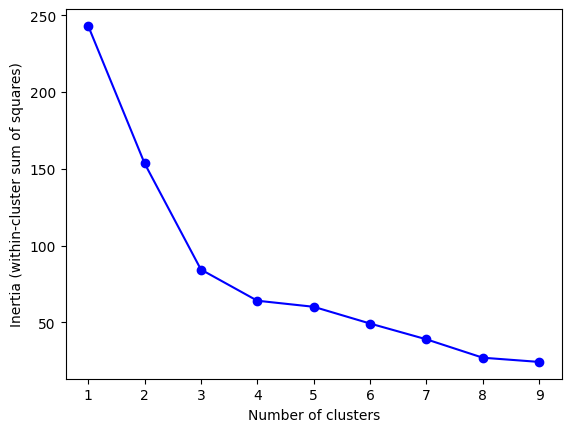

In [59]:
Ks = range(1, 10)
inertia = [KMeans(i).fit(zillow_features_scaled).inertia_ for i in Ks]

fig = plt.figure()
plt.plot(Ks, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()

In [66]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(zillow_features_scaled)

# print inertia & cluster center
print("inertia for k=4 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

inertia for k=4 is 66.41744107983709
cluster centers:  [[-0.2222095   0.99837833  0.75077055]
 [-0.23137781 -0.44795431 -0.38075033]
 [ 3.40131852 -0.72035775 -0.41653222]
 [-0.0863377   4.93108981  5.36472636]]
cluster labels:  [1 1 0 1 1 1 2 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 2 2 1 1 1 1 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 1 0 0 2 0 0 1 1 3 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1
 0 2 0 1 1 0]


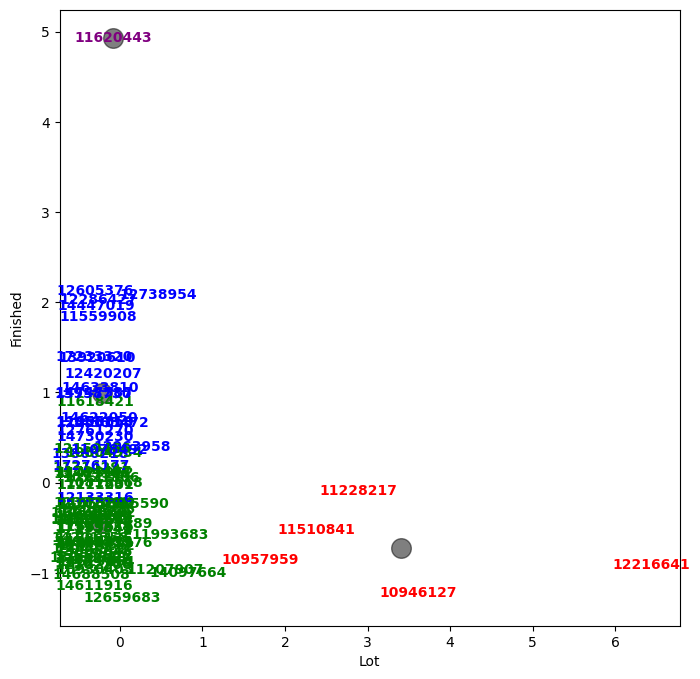

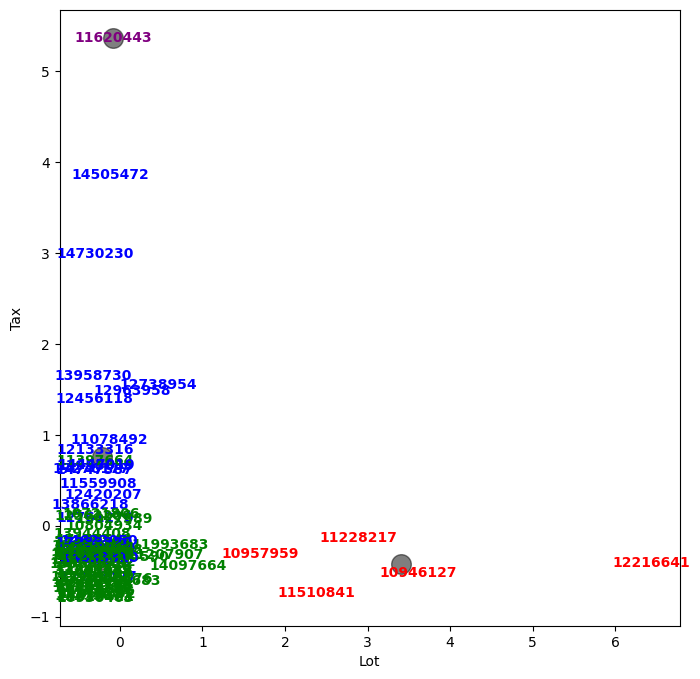

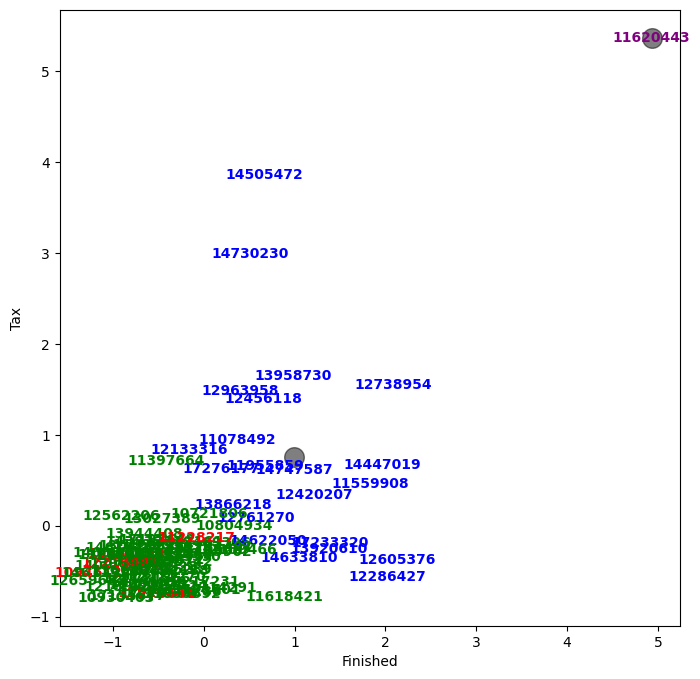

In [67]:
figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Lot', 'Finished', 'Tax']
colors = ['blue', 'green', 'red', 'purple']

centers = kmeans.cluster_centers_

for i in range(3):
    fig = plt.figure(i, figsize=(8, 8))
    x_1 = figs[i][0]
    x_2 = figs[i][1]
    plt.scatter(zillow_features_scaled.iloc[:, x_1], zillow_features_scaled.iloc[:, x_2], c=y, s=0, alpha=0)
    plt.scatter(centers[:, x_1], centers[:, x_2], c='black', s=200, alpha=0.5)
    for j in range(zillow_features_scaled.shape[0]):
        plt.text(zillow_features_scaled.iloc[j, x_1], zillow_features_scaled.iloc[j, x_2], zillow_data['parcelid'].iloc[j], 
                 color=colors[y[j]], weight='semibold', horizontalalignment = 'center', verticalalignment = 'center')
    plt.xlabel(labels[x_1])
    plt.ylabel(labels[x_2])

plt.show()

## Part 7

*10 points.* We're going to end our Zillow discussion by going to that podcast. I have three parts for you.

**Answer Me:**

- We've only seen one actual **machine learning algorithm** so far, **k-means clustering**. Is this a "black box", like discussed in the interview? What do you think they mean by black box?

- If you were trying to price houses using Zillow data, what types of **text** might be available? Based on some of the examples from the podcast, what are some **features** that you could extract from this text? Visit [Zillow](https://www.zillow.com/homes/27516_rb/) if you aren't familiar with some of the additional available data. 

- Create a new **categorical** feature in the Zillow data. Why did you choose to do what you did? How might you use it to price homes?

## Part 8

*5 points.* Let's get to some stock data. We're going to use `pandas-datareader` in comboniation with `yfinance`. These packages can be used to pull data from Yahoo! Finance. Yahoo! Finance breaks a lot, but the price data is OK to use for our purposes. They have other data, but it often doesn't work correctly. I don't really trust it, since I don't know how it's created. 

That was a theme of the podcast, as well.

You'll need to install both using `pip`. I did this at the terminal in my Codespace. Look up how to do this (Google or my notes).

Use `pandas data-reader` to pull in some stock returns using Yahoo!. Let’s look at these five stocks: AAPL, PG, BA, AXP, and KSS. Pull in daily price data from 2010 through 2022 and calculate discrete returns.  Only keep observations where none of the stocks have missing returns.

In order to use `pandas data-reader`, include this in your set-up code:

```
import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as pdr
```

Then, you need to get the price data. Try something like this - you'll need to add a few more steps, of course.

```
stock_data = pdr.get_data_yahoo(ticker_list, start_date, end_date)
prices = stock_data['Adj Close']
```

Look at stock_data. **Answer Me:** Do you notice anything different about this dataframe? What's going on? See my notes for a discussion of these more complex `pandas` dataframe.

**Calculate daily returns and provide a set of summary statistics**. Show the number of observations and the number of columns. 

**Answer Me:** Also, what's the index for this data?

In [20]:
import yfinance as yf
import datetime

yf.pdr_override()
from pandas_datareader import data as pdr

In [21]:
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
ticker_list = ["AAPL", "PG", "BA", "AXP", "KSS"]

stock_data = pdr.get_data_yahoo(ticker_list, start_date, end_date)

prices = stock_data['Adj Close']

rets = prices.pct_change().dropna()

[*********************100%%**********************]  5 of 5 completed


In [22]:
stock_data

Price        Adj Close                                                 \
Ticker            AAPL         AXP          BA        KSS          PG   
Date                                                                    
2010-01-04    6.470742   33.192959   43.777542  32.376499   40.160061   
2010-01-05    6.481929   33.119957   45.211346  32.400494   40.173206   
2010-01-06    6.378824   33.655315   46.582794  32.820339   39.982658   
2010-01-07    6.367032   34.201168   48.468552  32.064610   39.765808   
2010-01-08    6.409362   34.176723   48.001026  31.686745   39.713249   
...                ...         ...         ...        ...         ...   
2022-12-23  130.959946  144.410736  189.059998  22.924297  147.907349   
2022-12-27  129.142441  143.791916  189.399994  23.034420  149.196274   
2022-12-28  125.179680  141.454163  188.380005  22.171780  147.267746   
2022-12-29  128.725311  144.705444  188.910004  23.016069  147.878281   
2022-12-30  129.043121  145.127777  190.490005  23.172079  146.880081   

Price            Close                                                 ...  \
Ticker            AAPL         AXP          BA        KSS          PG  ...   
Date                                                                   ...   
2010-01-04    7.643214   40.919998   56.180000  53.980000   61.119999  ...   
2010-01-05    7.656429   40.830002   58.020000  54.020000   61.139999  ...   
2010-01-06    7.534643   41.490002   59.779999  54.720001   60.849998  ...   
2010-01-07    7.520714   41.980000   62.200001  53.459999   60.520000  ...   
2010-01-08    7.570714   41.950001   61.599998  52.830002   60.439999  ...   
...                ...         ...         ...        ...         ...  ...   
2022-12-23  131.860001  147.020004  189.059998  24.980000  152.619995  ...   
2022-12-27  130.029999  146.389999  189.399994  25.100000  153.949997  ...   
2022-12-28  126.040001  144.009995  188.380005  24.160000  151.960007  ...   
2022-12-29  129.610001  147.320007  188.910004  25.080000  152.589996  ...   
2022-12-30  129.929993  147.750000  190.490005  25.250000  151.559998  ...   

Price             Open                                                 \
Ticker            AAPL         AXP          BA        KSS          PG   
Date                                                                    
2010-01-04    7.622500   40.810001   55.720001  54.500000   61.110001   
2010-01-05    7.664286   40.830002   56.250000  53.880001   61.130001   
2010-01-06    7.656429   41.230000   58.230000  54.180000   60.939999   
2010-01-07    7.562500   41.259998   59.509998  54.599998   60.580002   
2010-01-08    7.510714   41.759998   61.540001  53.450001   60.360001   
...                ...         ...         ...        ...         ...   
2022-12-23  130.919998  145.229996  188.250000  24.040001  152.309998   
2022-12-27  131.380005  147.289993  189.580002  24.900000  152.699997   
2022-12-28  129.669998  146.210007  189.320007  24.969999  154.279999   
2022-12-29  127.989998  145.080002  189.000000  24.309999  152.809998   
2022-12-30  128.410004  146.009995  187.500000  24.840000  152.429993   

Price          Volume                                        
Ticker           AAPL       AXP        BA      KSS       PG  
Date                                                         
2010-01-04  493729600   6894300   6186700  3239900  9190800  
2010-01-05  601904800  10641200   8867800  2539600  8649400  
2010-01-06  552160000   8399400   8836500  3207800  9908400  
2010-01-07  477131200   8981700  14379100  8330300  8972800  
2010-01-08  447610800   7907700   7146600  3438100  8464600  
...               ...       ...       ...      ...      ...  
2022-12-23   63814900   1671800   3983600  3265100  3401800  
2022-12-27   69007800   1858500   5014800  2827600  4215100  
2022-12-28   85438400   1490200   4426300  4066900  4197500  
2022-12-29   75703700   1758500   4518900  2753400  3809100  
2022-12-30   77034200   2247200   4007400  3044600  453

In [23]:
rets.describe()

Ticker,AAPL,AXP,BA,KSS,PG
count,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000
mean,0.001079,0.000623,0.000714,0.000322,0.000456
std,0.018089,0.018595,0.022968,0.029201,0.010960
min,-0.128647,-0.148186,-0.238484,-0.204921,-0.087374
25%,-0.007578,-0.007100,-0.009037,-0.010834,-0.004602
50%,0.000893,0.000690,0.000710,0.000187,0.000563
75%,0.010656,0.009118,0.010374,0.012004,0.005877
max,0.119808,0.218823,0.243186,0.360162,0.120090


## Part 9

*15 points.* Let's try some slicing, dicing, and graphing.

- Use `.loc` to select only *AAPL* and *PG* returns for 2013. Just show the first 20 results. Also, how do you select two separate columns? A **list** is involved.
  
- Use `.iloc` to select the first 10 *AAPL* and *PG* returns. Notice that selecting 10 and showing the first 20 are subtly different. 

I want you to see how these two methods differ and how you can specify which rows and columns you want.
  
Go back to the full set of returns.

- Use `.min` to create a **new variable** that is the **minimum daily return across all of the stocks**. Call this new variable *min_ret*. Hint: `.min()` can take an *axis* argument. First, you tell it what function to use. You tell it the axis you want to apply it to using `axis=`. Do you want to apply the calculation column-wise (e.g. a value of each column) (`axis=0`) or row-wise (e.g. a value for each row) (`axis=1`)? This is a [helpful explanation](https://www.statology.org/axis-0-axis-1-python-pandas/).  

- Create a new DataFrame with only *PG* and *BA* daily returns where *one of the* daily returns is negative. Note that this is an "OR" boolean test. **You can use | as the OR operator**. You can call this DataFrame *pg_ba_negative*. This is an example of **filtering**. Use `.loc` to select the columns you want. 

- Finally, use `pandas plot` to make a graph of **cumulative returns** for all of the stocks. Remember, these are discrete returns. See my notes for some examples.

How can you tell if something is `pandas plot` vs. `matplotlib`? `pandas plot` is applied directly to a DataFrame, like this: `df.plot()`. `matplotlib` can be used different ways, but you'll often see a `plt` or an `ax` involved. `pandas plot` is using `matplotlib` under the surface, so you can actually mix and match methods. 

You have some columns in your DataFrame, like *year* and *min_ret*, that aren't going to make sense in this graph. Drop these columns when calculating your cumulative returns. You can subset your main returns DataFrame when doing the calculation using your ticker list. Or, you can create a new DataFrame that only has what you want. Subsetting is easier, though!

What do I mean by **subsetting**? That's just column selection. You can select the columns you want and work with that, without saving things to a new DataFrame first. 

Multiply all of the cumulative returns by 100. Include a title on your graph and change the `alpha` to be 0.7. 


In [26]:
rets.loc['2013-01-01':'2013-12-31', ['AAPL', 'PG']].head(20)

Ticker,AAPL,PG
Date,,
2013-01-02,0.031682,0.022095
2013-01-03,-0.012623,-0.006341
2013-01-04,-0.027854,0.002030
2013-01-07,-0.005882,-0.006802
2013-01-08,0.002691,-0.001603
2013-01-09,-0.015629,0.005401
2013-01-10,0.012396,0.005662
2013-01-11,-0.006132,-0.000721
2013-01-14,-0.035652,0.005923


In [29]:
rets.iloc[0:10, [0,4]]

Ticker,AAPL,PG
Date,,
2010-01-05,0.001729,0.000327
2010-01-06,-0.015907,-0.004743
2010-01-07,-0.001849,-0.005424
2010-01-08,0.006648,-0.001322
2010-01-11,-0.008821,-0.003971
2010-01-12,-0.011375,0.011462
2010-01-13,0.014105,0.010346
2010-01-14,-0.005791,0.000976
2010-01-15,-0.016712,-0.012342


In [ ]:
rets['min_ret'] = rets.min(axis = 1)
rets['min_ret_2'] = rets.aggregate(min, axis = 1)

In [31]:
pg_ba_negative = rets[(rets['PG'] < 0) | (rets['BA'] < 0)].loc[:, ['BA', 'PG']]
pg_ba_negative

Ticker,BA,PG
Date,,
2010-01-06,0.030334,-0.004743
2010-01-07,0.040482,-0.005424
2010-01-08,-0.009646,-0.001322
2010-01-11,-0.011851,-0.003971
2010-01-12,-0.007228,0.011462
...,...,...
2022-12-16,0.005334,-0.004434
2022-12-19,0.005306,-0.000266
2022-12-22,-0.039541,0.002305


In [33]:
rets

Ticker,AAPL,AXP,BA,KSS,PG,year
Date,,,,,,
2010-01-05,0.001729,-0.002199,0.032752,0.000741,0.000327,2010
2010-01-06,-0.015907,0.016164,0.030334,0.012958,-0.004743,2010
2010-01-07,-0.001849,0.016219,0.040482,-0.023026,-0.005424,2010
2010-01-08,0.006648,-0.000715,-0.009646,-0.011784,-0.001322,2010
2010-01-11,-0.008821,-0.011442,-0.011851,-0.001514,-0.003971,2010
...,...,...,...,...,...,...
2022-12-23,-0.002798,0.011768,0.004303,0.038238,0.002825,2022
2022-12-27,-0.013878,-0.004285,0.001798,0.004804,0.008714,2022
2022-12-28,-0.030685,-0.016258,-0.005385,-0.037450,-0.012926,2022


In [32]:
rets_cum = (1+rets[ticker_list]).cumprod()*100
rets_cum

Ticker,AAPL,PG,BA,AXP,KSS
Date,,,,,
2010-01-05,100.172894,100.032733,103.275203,99.780068,100.074111
2010-01-06,98.579490,99.558261,106.407971,101.392936,101.370871
2010-01-07,98.397244,99.018296,110.715562,103.037419,99.036679
2010-01-08,99.051431,98.887423,109.647604,102.963775,97.869583
2010-01-11,98.177652,98.494764,108.348190,101.785657,97.721361
...,...,...,...,...,...
2022-12-23,2023.878417,368.294632,431.865263,435.064367,70.805362
2022-12-27,1995.790372,371.504103,432.641909,433.200055,71.145493
2022-12-28,1934.549156,366.701999,430.311972,426.157136,68.481090


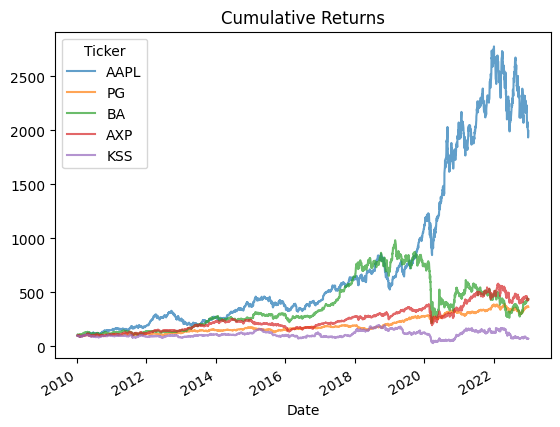

In [34]:
rets_cum.plot.line(title = 'Cumulative Returns', alpha=0.7);


## Part 10

*15 points.* Let's end with some **optimization**. Use `scipy` and that package's optimizer to find the **max Sharpe portfolio** for these five stocks. You can assume a risk-free rate of zero. We are going to just use the stocks, so it might be easier to create a DataFrame that just has those five stocks in it and work with that. You can also subset, like above. 

- **Optimize** using the mean and standard deviation of the **daily** returns. Allow shorting, but don't let any position be less than -20% of the portfolio.

- **Print** the weights. Which stock gets the largest weight? Does that make sense?
  
- What is the **annualized Sharpe ratio** for this portfolio? You can (approximately) annualize a daily Sharpe like this by multiplying by the square root of 252. 

You can do all of this by **modifying the code in our notes and labs**. Thing carefully about what you're doing. How many assets do we have now? What functions do you need defined? What do you need to calculate first, before you can run the optimization? If you want to find the Sharpe, what weights do you want to use? How do you access them?

**Again, every piece of this is in our notes.** Spend some time reading them, if you haven't already.

In [37]:
import scipy.optimize as sco

def port_ret(weights):
    return np.sum(avg_rets * weights)

def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(cov_rets, weights)))

def min_func_sharpe(weights):  
    return -port_ret(weights) / port_vol(weights) 

noa = 5

stock_rets = rets[ticker_list]

avg_rets = stock_rets.mean()
cov_rets = stock_rets.cov()

eweights = np.array(noa * [1. / noa,])  
eweights 

cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  
bnds = tuple((-0.2, 1) for x in range(noa)) 

opts = sco.minimize(min_func_sharpe, eweights,
                    method='SLSQP', bounds=bnds,
                    constraints=cons) 

opts

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.06404723374566841
       x: [ 5.655e-01  3.941e-01  5.253e-02  5.290e-02 -6.498e-02]
     nit: 13
     jac: [ 1.987e-04 -2.995e-04  8.109e-05 -3.517e-04 -3.075e-04]
    nfev: 78
    njev: 13

In [38]:
max_sharpe_weights = opts.x

max_sharpe = port_ret(max_sharpe_weights)/port_vol(max_sharpe_weights)
print(max_sharpe*np.sqrt(252))

1.016718315915975


## Part 11

**ENJOY SPRING BREAK!!!**

Do the usual add/commit/synch. I hope that this "exam" did more than just reinforce some basic data wrangling principles. I tried to introduce you to a few new tools and really show you how the day-to-day data process works. Financial data has its own peculiarities too.